In [1]:
!pip install gradio_client Pillow requests

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 321.9/321.9 kB 6.6 MB/s eta 0:00:00


In [2]:
# Import necessary libraries
from gradio_client import Client, handle_file
import requests
from PIL import Image
from IPython.display import display, Image as IPImage
import io
import base64
from google.colab import userdata

In [3]:
# Initialize the client
client = Client("deepseek-ai/Janus-Pro-7B", hf_token = userdata.get('HF_TOKEN'))

Loaded as API: https://deepseek-ai-janus-pro-7b.hf.space ✔


In [4]:
# Function to load image from local path
def load_image_from_path(image_path):
    return Image.open(image_path)

In [5]:

# Function for image understanding
def ask_about_image(image_path, question):
    client = Client("deepseek-ai/Janus-Pro-7B")
    result = client.predict(
        handle_file(image_path),  # Use handle_file for proper file processing
        question,
        api_name="/multimodal_understanding"
    )
    return result

In [6]:
# Function for text-to-image generation
def generate_image(prompt):
    try:
        # Generate images
        result = client.predict(
            prompt,     # String prompt
            api_name="/generate_image"
        )

        # The result is a list of dictionaries containing image paths
        if isinstance(result, list):
            for item in result:
                if isinstance(item, dict) and 'image' in item:
                    # Download and display each image
                    image_path = item['image']
                    try:
                        img = Image.open(image_path)
                        display(img)
                    except Exception as e:
                        print(f"Could not open image: {str(e)}")
        return "Image generation complete"
    except Exception as e:
        return f"Error: {str(e)}"

In [7]:
from google.colab import files
print("Please upload an image file:")
uploaded = files.upload()

Please upload an image file:


Saving airplane-flying-over-islands-sea-sunrise-summer-airplane-flying-over-islands-sea-sunrise-summer.webp to airplane-flying-over-islands-sea-sunrise-summer-airplane-flying-over-islands-sea-sunrise-summer.webp


In [8]:
filename = list(uploaded.keys())[0]
image_from_upload = load_image_from_path(filename)
question = "Describe this image in detail"
print("\nImage Understanding from uploaded file:")
response = ask_about_image(filename, question)
print(f"Question: {question}")
print(f"Answer: {response}\n")


Image Understanding from uploaded file:
Loaded as API: https://deepseek-ai-janus-pro-7b.hf.space ✔
Question: Describe this image in detail
Answer: This image depicts an airplane flying over a stunning coastal landscape. The airplane is captured in mid-flight, with its nose pointing slightly upwards, suggesting it is ascending or cruising. The aircraft has a white fuselage with a red tail fin and engines, and the wings are extended with visible flaps and ailerons.

Below the airplane, the landscape features a breathtaking combination of deep blue ocean waters and rugged, mountainous terrain. The coastline curves gently, with a mix of sandy beaches and rocky outcrops. The ocean is a vibrant turquoise near the shore, gradually deepening into a rich blue further out.

The sky above is clear, with a gradient of blue tones, transitioning from a lighter shade near the horizon to a deeper blue higher up. The overall scene is bathed in natural light, suggesting it is daytime, and the weather a

Text-to-Image Generation:
Prompt: A surreal scene of a floating city above the clouds, with futuristic skyscrapers made of glass and light, connected by translucent bridges. Below, ancient forests with towering trees and cascading waterfalls. The sky is painted with hues of pink and orange as the sun sets, casting a golden glow on the entire landscape. In the foreground, mythical creatures like dragons and phoenixes soar gracefully.


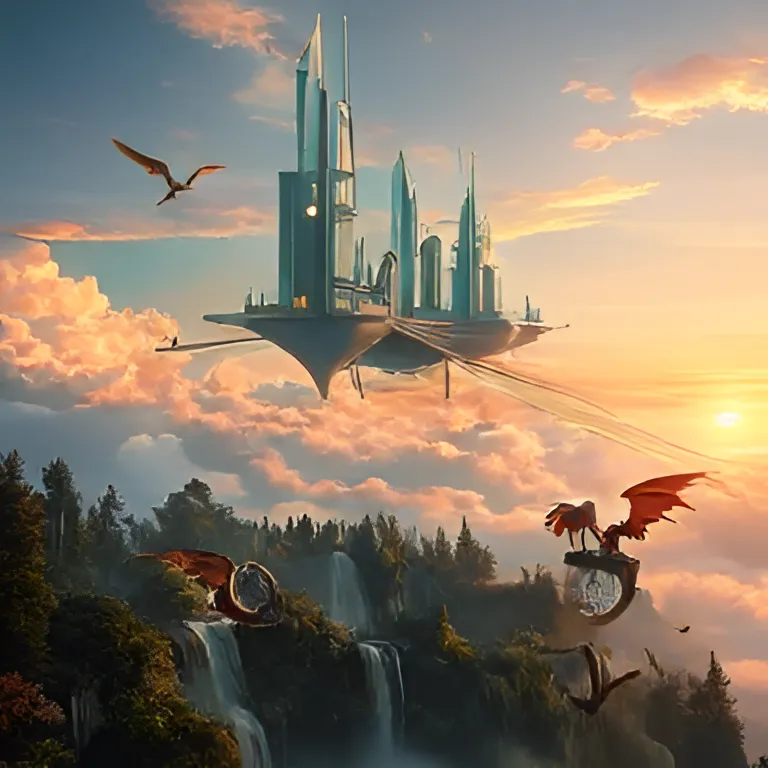

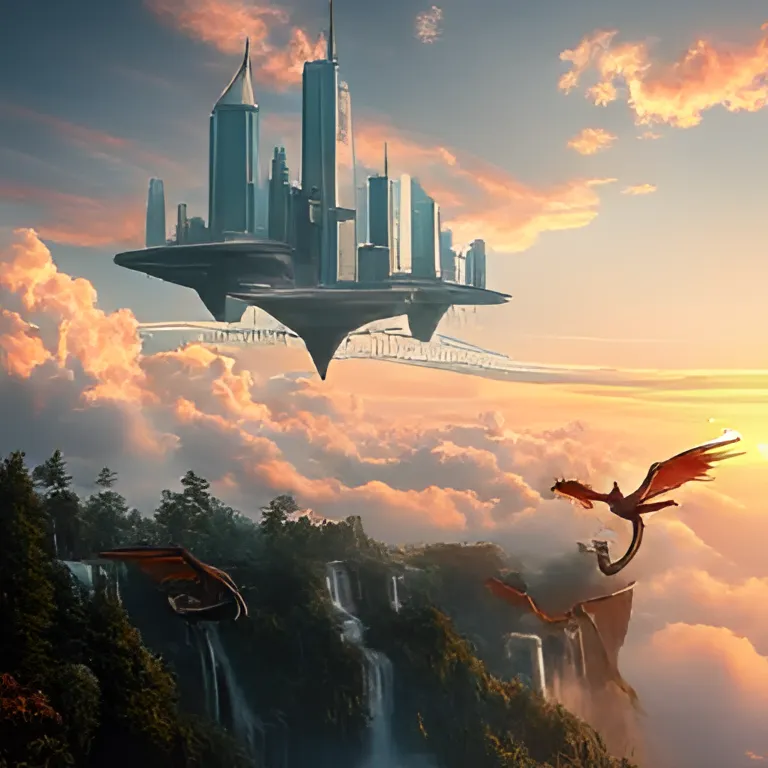

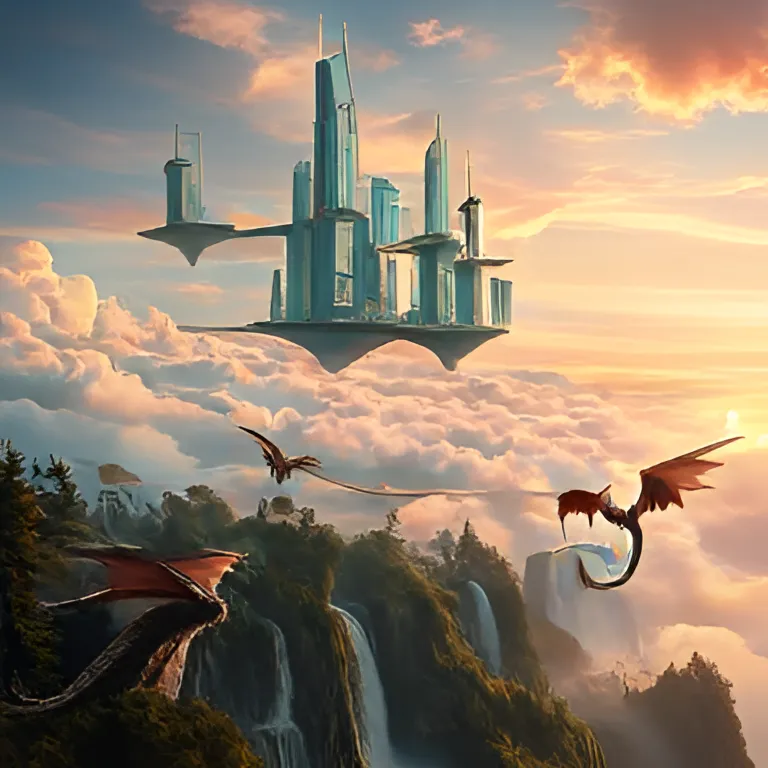

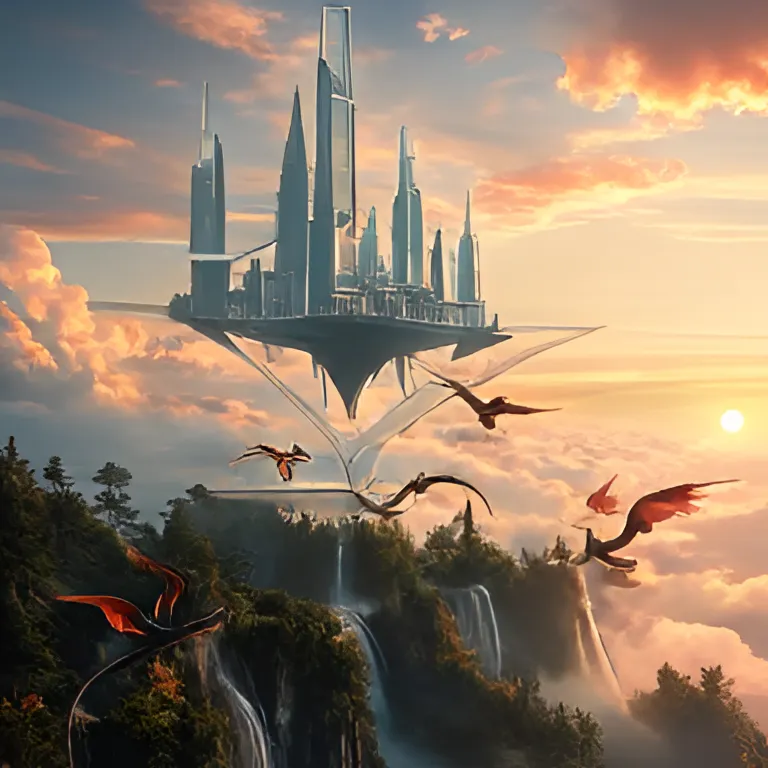

In [9]:
prompt = "A surreal scene of a floating city above the clouds, with futuristic skyscrapers made of glass and light, connected by translucent bridges. Below, ancient forests with towering trees and cascading waterfalls. The sky is painted with hues of pink and orange as the sun sets, casting a golden glow on the entire landscape. In the foreground, mythical creatures like dragons and phoenixes soar gracefully."
print("Text-to-Image Generation:")
print(f"Prompt: {prompt}")
result = generate_image(prompt)